# Lighthill's Elongated-Body Theory (EBT)

Lighthill's large-amplitude elongated-body theory utilizes reactive (rather than resistive) theory in order to interpret observational data on animal movements of arbitrary large amplitude. Reactive theory emphasizes reactive forces between a small volume of water and the parts of the animal's surface in contact with it. 

Lighthill's large-amplitude elongated-body theory applies to fish that swim with carangiform motion. Carangiform motion is characterized by fast forward motion, larger wave amplitudes towards the tail in the last half or one-third of the body length than in the anterior, and slower phase of lateral oscillations in this posterior section than that of the anterior. As a result, reactive forces seem to dominate in carangiform motion because the acceleration of water passed by the fish takes place very fast when the posterior section passes and flicks it into motion through the instantaneously acting virtual-mass effect.

The goal of Lighthill's 1971 paper is to extend reactive theory and slender-body theory so that it can be applied to interpret observational data on animal movements of arbitrary large amplitude. In this model, it is hopefully applied to carangiform movements. 

In terms of force and propulsion, Lighthill's elongated-body theory makes use of three principles in a frame of reference in which the water far from the fish is at rest:

1. Water momentum near a section of fish is in a direction perpendicular to the backbone and has magnitude equal to the virtual mass, $m$ per unit length, times the component $w$ of fish velocity in that direction.
2. Thrust can be obtained by considering rate of change of momentum within a volume enclosing the fish whose boundary at each instant includes a flat surface $\Pi$ perpendicular to the caudal fin through its posterior end.
3. In the momentum balance it is necessary to take into account transfer of momentum across $\Pi$ not only by convection but also by the action of the resultant $\frac{1}{2} mw^2$ of the pressures generated by the motions within the plane $\Pi$.

The coordinates used by Lighthill are:

* $y$-axis as the vertical
* $x$-axis and $z$-axis as the horizontal
* Lagrangian coordinate a along the fish body that takes values from 0 (tail) to $l$ (head), the length of the fish

where a left-handed system of axes is used.

The fish swims at a fixed horizontal level ($y=0$), where the constant mean direction of swimming is taken as that of the positive $x$-axis. Additionally, the position coordinates are regarded as $(x(a,t), z(a,t))$ as the point moves due (i) to swimming actions, (ii) to the resulting forward motion of the fish, and (iii) to any lateral recoil motions that may be involuntarily produced.

In addition, we have several notation:

* $(u,w)$ is the horizontal velocity vector (in the Lagrangian fish body frame), where $u$ is the tangential component (forward direction) and $w$ is the perpendicular component (lateral direction) of the fish body
* $(P,Q)$ is the force vector where $P$ is thrust and $Q$ is sideforce; $P$ is forward direction, $Q$ is lateral direction
* $V$ is the magnitude of the $(u,w)$
* $W$ is the component perpendicular to the direction of mean motion

In an elongated body form, the virtual mass is large in respect of the $w$ motions, while the $u$ motions have negligible virtual mass.

The inextensibility of the fish's spinal column requires $ \left(\frac{\partial x}{\partial a}\right)^2 + \left(\frac{\partial z}{\partial a}\right)^2 = 1$. 

The horizontal velocity vector (in a left-handed $x-z$ coordinate system) $\left(\frac{\partial x}{\partial t}, \frac{\partial z}{\partial t} \right)$ has a tangential component (relative to the spinal column) $u= \frac{\partial x}{\partial t} \frac{\partial x}{\partial a} + \frac{\partial z}{\partial t} \frac{\partial z}{\partial a}$ and a perpendicular component $w= \frac{\partial z}{\partial t} \frac{\partial x}{\partial a} - \frac{\partial x}{\partial t} \frac{\partial z}{\partial a}$.

The momentum per unit length of fish is represented by the vector $mw\left(-\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right)$ where the factor in parentheses is a unit vector in the $w$-direction. $m$ is the given cross-section of the fish, which can be approximated by $\frac{1}{4} \pi \rho s^2$, where $\rho$ is the water density and $s$ is the depth of the cross-section. $m$ should be a fixed, known function $m(a)$.

It is difficult to use the rate of change of the momentum in the wake. A better approach would be to study the rate of change of momentum in a part $V$ that excludes the wake. This is done by considering a vertical plane $\Pi$ intersecting the tip of the caudal fin at right angles to the tip of the spinal column. This plane swings around as the fine moves. At each instant, the part $V$ of water whose momentum is considered is that half-space, bounded by the plane $\Pi$, which includes the fish and excludes the wake. The momentum in $V$ can be written as the integral of $mw \left( -\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right)$ from $0$ to $l$ with respect to $a$, and its rate of change can be written as the sum of three terms:

1. rate of change due to convection of momentum out of $V$ across the plane $\Pi$
2. rate of change due to the pressure force acting across $\Pi$
3. minus the reactive force $(P,Q)$ with which the fluid acts on the fish

In general, 
$(P,Q) = \left[mw \left( \frac{\partial z}{\partial t}, -\frac{\partial x}{\partial t} \right) - \frac{1}{2} mw^2 \left(\frac{\partial x}{\partial a}, \frac{\partial z}{\partial a} \right) \right]_{a=0} - \frac{d}{dt} \int_{0}^{l} mw \left(-\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right) da$

The mean thrust can be written as $\overline{P} = \overline{ \left[ mw \left(\frac{\partial z}{\partial t}-\frac{1}{2} w \frac{\partial x}{\partial a} \right) \right]_{a=0}}$


In [1]:
%matplotlib inline

from scipy import spatial
from scipy.interpolate import CubicSpline
#from scipy.integrate import simps
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sympy import *
import numpy.ma as ma
import csv

a, t = symbols('a t')
m0, w0, omega, z0 = symbols('m0 w0 omega z0')

## Symbolic Implementation

In the first attempt, we will implement Lighthill's model symbolically. This means that our functions must be analytically solveable; reasonable examples include sinusoidal functions.

We will mainly be working with the SymPy package, which can handle symbolic differentiation and integration.

In [254]:
""" 
Important variables:
P: thrust
Q: sideforce
m: the virtual mass per unit length
w: the perpendicular component of the fish body's velocity, relative to the body
z: the Cartesian coordinate for side motion
x: the Cartesian coordinate for forward motion
a: the Lagrangian coordinate along the fish body, measured from the caudal fin
u: the tangential component of the fish body's velocity
t: time
"""

"""
Pcomponent(m,w,x,z,l) should output the P component of our reactive force.
Similarly, Qcomponent(m,w,x,z,l) should output the Q component.
"""
def Pcomponent(m,w,x,z,l):

    P = m*w*diff(z,t)-(1/2)*m*w**2*diff(x,a) - diff(integrate(
        m*w*(-diff(z,a)),(a,0,l)) ,t)
#     print(P)
#     print(P.subs(a,0))
    return P.subs(a,0)

def Qcomponent(m,w,x,z,l):
    Q = -(m*w*diff(x,t)+(1/2)*m*w**2*diff(z,a)) - diff(integrate(
        m*w*diff(x,a),(a,0,l)),t)
#     print(Q)
#     print(Q.subs(a,0))
    return Q.subs(a,0)

In [255]:
"""
reactiveForce(m,w,x,z,l) should output the force vector based on 
the P component and Q component defined above.
"""
def reactiveForce(m,w,x,z,l):
    reactiveForceVector = np.array([Pcomponent(
        m,w,x,z,l),Qcomponent(m,w,x,z,l)])
    return reactiveForceVector

In [256]:
"""
averageThrust(m,w,x,z,l) should output the average thrust based on Pcomponent.
"""

def averageThrust(m,w,x,z,l):
    Pavg = m*w*diff(z,t)-(1/2)*m*w**2*diff(x,a)
    return Pavg.subs(a,0)

### Tests for Pcomponent, Qcomponent, reactiveForce, and averageThrust below:

In [257]:
Pcomponent(m0,w0*cos(omega*t),0,z0*sin(omega*t),1)

m0*omega*w0*z0*cos(omega*t)**2

In [258]:
Qcomponent(m0,w0*cos(omega*t),0,z0*sin(omega*t),1)

0

In [262]:
reactiveForce(m0,w0*cos(omega*t),0,z0*sin(omega*t),1)

array([m0*omega*w0*z0*cos(omega*t)**2, 0], dtype=object)

In [261]:
# should probably be the same as the instantaneous value of Pcomponent
averageThrust(m0,w0*cos(omega*t),0,z0*sin(omega*t),1)

m0*omega*w0*z0*cos(omega*t)**2

## Numerical Implementation

Once our symbolic model works, we will implement the model numerically. This implementation will be the most useful when we have arbitrary data and functions that cannot be solved analytically. 

We will mainly be working with numPy, which can handle numerical differentiation and integration.

We will attempt to plot some waveforms as well as extract steps such as dx, dz, and da. Our overall goal is to be able to see a simplistic waveform model (best through animation), test for consistency in coordinate axes, and utilize our results for force production.

We will use cubic splining in order to fit functions to kinematics data.

In [ ]:
"""Here, we want to try to make an array with certain steps (dx, dz, da) so that I can
later retrieve each point for analysis. We will be forming a simple sinusoidal wave.

Next goal: animate plot, feed in kinematic data, clean up code in terms of 
renaming variables such as step size
"""
class Lighthill:
    
    
    """
    Initializer for the Lighthill class. 
    t: an array of time values at which data was taken.
    x: an array of x values. Ideally, x would range from 0 to 1.
    z: an array of z values. z should also range from 0 to 1.
    s: an array of s values, where s is the depth of the cross-section. Used
          to calculate the virtual mass m.
    rho: the density of the fluid. Used to calculate the virtual mass m.
    
    Arrays should be same number of elements.
    """
    
    """
    The constructor below is using the crude method, where both sets of derivatives are found using
    discrete steps

    def __init__(self, t, x, z, s, rho):
        self.t = t
        self.x = x
        self.z = z
        
        self.body = np.array(list(zip(x,z))) # np array of coordinates (x,z)
        #self.body = np.dstack(x,z) another possible way of writing the line above
        
        self.dt = np.diff(t) # crude discretizing of data
        self.dx = np.diff(x)
        self.dz = np.diff(z)
        self.da = np.sqrt((np.diff(fishy.x))**2+(np.diff(fishy.z))**2)
        
        self.dxda = self.dx/self.da # this is the crude way
        self.dzdt = self.dz/self.dt # W 
        
        self.a = np.concatenate((np.array([0]), np.cumsum(self.da)), axis=0) # reconstructing a values from da
        
        self.m = (1/4)*np.pi*rho*s**2 # the virtual mass
        
        self.w = (self.dz/self.dt)*self.dxda-(self.dx/self.dt)*self.dzda # perpendicular component of horizontal velocity vector
        self.w2 = -(self.dx/self.dt)*(self.dz/self.da) # for testing purposes, since w is coming out to 0s
        
        #self.thrustForce = (self.m*self.w*(self.dz/self.dt)-(1/2)*self.m*(self.w**2)*(self.dx/self.da)
                              -(np.sum(self.m*self.w*(-self.dz)))/self.dt)
        #self.sideForce = (self.m*self.w*(-self.dx/self.dt)-(1/2)*self.m*(self.w**2)*(self.dz/self.da)
                            -(np.sum(self.m*self.w*self.dx))/self.dt)
        #self.forceVector = np.array(list(zip(self.thrustForce,self.sideForce))) # (P, Q)

        self.inextBool = None # inextensibility Boolean
    """

    """
    Below is the constructor using the cubic spline method.
    """
    
    def __init__(self, t, x, z, s, rho):
        self.t = t
        self.x = x
        self.z = z
        self.s = s
        
        self.body = None
        self.tail = None
        #self.tail = np.array(list(zip(x,z))) # np array of coordinates (x,z)
        #self.body = np.dstack(x,z) another possible way of writing the line above
        
        self.da = np.sqrt((np.diff(self.x))**2+(np.diff(self.z))**2)
        self.dt = np.concatenate((np.diff(t),np.array([np.diff(t)[-1]]))) # repeat last element
        
        self.a = np.concatenate((np.array([0]), np.cumsum(self.da)), axis=0) # reconstructing a values from da
        
        # below is an attempt to use cubic splining to find dx/da and dz/da        
        self.cs_xa = CubicSpline(self.a, self.x) # fit x(a)
        self.dxda = self.cs_xa(self.a,1)
        self.cs_za = CubicSpline(self.a, self.z) # z(a)
        self.dzda = self.cs_za(self.a,1)
        
        # attempt to use cubic splining to find dz/dt and dx/dt
        self.cs_xt = CubicSpline(self.t, self.x) # x(t)
        self.dxdt = self.cs_xt(self.t,1)
        self.cs_zt = CubicSpline(self.t, self.z) # z(t)
        self.dzdt = self.cs_zt(self.t,1)
        
        self.m = (1/4)*np.pi*rho*(s**2) # the virtual mass
    
        self.w = self.dzdt*self.dxda-self.dxdt*self.dzda
        
        # below are the forces. for now we omit the integral terms until I figure out the best method
        self.thrustForce = (self.m*self.w*self.dzdt-(1/2)*self.m*(self.w**2)*self.dxda
                            -np.trapz(self.m*self.w*(-self.dzda),self.a)/self.dt) # don't forget dt
        self.sideForce = (self.m*self.w*(-self.dxdt)-(1/2)*self.m*(self.w**2)*self.dzda
                          -np.trapz(self.m*self.w*(-self.dxda),self.a))
        self.forceVector = np.array(list(zip(self.thrustForce,self.sideForce))) # (P, Q)
        
        self.inextBool = None # inextensibility Boolean
   
    """
    def force(self):
        # to calculate thrust force at a point
        # thrustSumTerm = 
        self.thrustForce = 

        # sideSumTerm = 
        self.sideForce = 

        self.forceVector = 
    """
        
        
    """
    inextensibilityCheck checks the inextensibility of the fish body. It returns True if all of the elements in the
    array return 1 and returns False otherwise. inextensibilityCheck takes in an argument err whose default value is
    0. It can be changed to a float, which allows for +/- tolerance at which the function still returns True.
    """
    def inextensibilityCheck(self,err=0):
        inextensibilityArray = self.dxda**2 + self.dzda**2
        return np.all([i>=(1-err) and i<=(1+err) for i in inextensibilityArray], axis=0)
    
    def extractBody(self, filename):
        midlinedata = np.genfromtxt(filename, delimiter=",", skip_header=1,
                            missing_values=-1000,dtype=float,
                            usemask=True, unpack=True) # Masked array to cover -1000 values

        # pre-allocate array to group coordinates together
        midlinearray = np.ma.empty([len(midlinedata)//2,len(midlinedata[0]),2])

        for i in range(0,len(midlinedata)//2):
            midlinearray[i] = np.ma.dstack((midlinedata[2*i],midlinedata[2*i+1]))

        self.body = midlinearray
        return self.body
        
    
    def extractTail(self):
        midlinearray = self.body
        
        # extract tail points 
        compressedmidline = np.ma.empty([len(midlinearray),2])
        for i in range(0,len(midlinearray)):
            lastindex = np.ma.count(midlinearray[i])//2-1
            compressedmidline[i] = midlinearray[i][lastindex]

        # transpose midline data so that the array is in the form [[xarray] [yarray]]
        transposedmidline = np.transpose(compressedmidline)
        
        self.tail = transposedmidline
        return self.tail

    
    def underwater(self):
        print(self.tail)
        
        tailarray = self.tail
        tailx = tailarray[0]
        tailz = tailarray[1]
        underwatertail = np.ma.array([tailx[tailz<0],tailz[tailz<0]], dtype=float)
        return underwatertail
        
    def aCoordinates(self):
        
        daArray = np.ma.empty([len(self.body),len(self.body[0])-1])
        for i in range(0,len(self.body)):
            # x and y coordinates for a given time
            currentx = np.transpose(self.body[i])[0]
            currenty = np.transpose(self.body[i])[1]
            daArray[i] = ma.sqrt((np.diff(currentx))**2+(np.diff(currenty))**2)
    
        aArray = np.ma.empty([len(self.body),len(self.body[0])])
        for i in range(0, len(daArray)):
            aArray[i] = np.ma.concatenate((np.array([0]), np.cumsum(daArray[i])), axis=0)
        self.a = aArray
        
        return aArray
    
    
    """
    waveform generates plots for testing and verifying calculations
    need to rewrite this to comply with cubic spline data
    """
    def waveform(self):
        plt.subplot(111)
        
        #zvsx = plt.plot(self.x,self.z, label='z vs x')
        #dzdxvsx = plt.plot(self.x[1:],(self.dz/self.dx),label='dz/dx vs x')
        #avsx = plt.plot(self.x,self.a, label='a vs x')
        #wvsx = plt.plot(self.x[1:],self.w, label='w vs x')
        PvsQ = plt.plot(self.thrustForce,self.sideForce)
#         xvsa = plt.plot(self.aCoordinates(),self.)
#         yvsa = 
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    def cubicSplines(self):
        dxdaArray = np.ma.empty([len(self.body),len(self.body[0])])
        dzdaArray = np.ma.empty([len(self.body),len(self.body[0])])
        for i in range(len(self.body)):
            # at a given time
            currentx = np.transpose(self.body[i])[0]
            currentz = np.transpose(self.body[i])[1]
            currenta = self.aCoordinates()[i]
            
            cs_xa = CubicSpline(ma.compressed(currenta), ma.compressed(currentx)) # fit x(a)
            dxda = cs_xa(currenta,1)
            cs_za = CubicSpline(ma.compressed(currenta), ma.compressed(currentz)) # z(a)
            dzda = cs_za(currenta,1)
            
            dxdaArray[i] = dxda
            dzdaArray[i] = dzda
        

        plt.plot(self.aCoordinates()[1], dxdaArray[1])
    
    """print functions galore"""
    def test(self):
        print('t is: ', self.t)
        print('x is: ', self.x)
        print('z is: ', self.z)
        print('a is: ', self.a)
        print('w is: ', self.w)
        print('m is: ', self.m)
        print('dzdt is: ', self.dzdt)
        print('dxdt is: ', self.dxdt)
        print('dxda is: ', self.dxda)
        print('dzda is: ', self.dzda)
        #print('term 2 of w is: ', self.w2)
        print('The force vector is: ', self.forceVector)
        print('Is the body inextensible? ', self.inextBool)
        print('The timesteps are: ', self.dt)
#         print('The x-steps are: ', self.dx)
#         print('The z-steps are: ', self.dz)
#         print('The a-steps are: ', self.da)

### Tests

We will attempt to plot some waveforms as well as extract steps such as dx, dz, and da. Our overall goal is to be able to see a simplistic waveform model (best through animation), test for consistency in coordinate axes, and utilize our results for force production.

In [50]:
tTemp = np.linspace(0,1,10,endpoint=True,dtype=float)
xTemp = np.linspace(0,1,10,endpoint=True,dtype=float) 
zTemp = np.sin(xTemp) # approx 1 or 0.5 
sTemp = np.array([0.094, 0.087, 0.079, 0.083, 0.087,
                 0.088, 0.083, 0.084, 0.092, 0.093]) # took s values from 1971 Lighthill

fishy = Lighthill(tTemp, xTemp, zTemp, sTemp, 997) #density of water 997 kg/m^3
fishy.inextensibilityCheck(1e-3)
fishy.test()

t is:  [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
x is:  [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
z is:  [0.         0.11088263 0.22039774 0.3271947  0.42995636 0.52741539
 0.6183698  0.70169788 0.77637192 0.84147098]
a is:  [0.         0.15697336 0.31298374 0.46709821 0.6184443  0.76624126
 0.90983229 1.04871802 1.18259069 1.31136789]
w is:  [ 9.41802667e-05 -2.89674057e-05  3.86284082e-06 -5.16173725e-06
 -1.92489583e-06 -5.63544201e-06  8.24647013e-06 -3.95963611e-05
  1.52097978e-04 -5.67785474e-04]
m is:  [6.91895884 5.92684466 4.88696493 5.39437612 5.92684466 6.06387701
 5.39437612 5.52514413 6.62766722 6.77252999]
dzdt is:  [1.00002648 0.99382534 0.97541124 0.94495555 0.90284931 0.84960582
 0.78589028 0.71246029 0.63032576 0.54011062]
dxdt is:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
dxda is:  [0.70712991 0.70928425 0.71585904 0.72683742 0.7422625

### Cubic splining tests using data from above

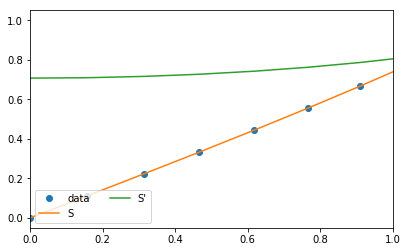

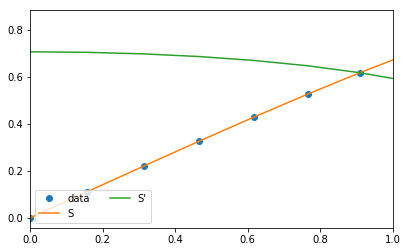

[0.70705445 0.70493363 0.69825309 0.68683421 0.67015318 0.64751149
 0.61794453 0.5803651  0.53315231 0.47595643]
[0.70712991 0.70928425 0.71585904 0.72683742 0.74226258 0.76212502
 0.78630922 0.81453733 0.84607745 0.88016903]


In [54]:
#trying to use x(a)
cs_x = CubicSpline(fishy.a, fishy.x)
#xs = np.arange(0, 1,0.1) # I don't think this line is necessary; should use a instead of xs ?
plt.figure(figsize=(6.5,4))
plt.plot(fishy.a,fishy.x,'o',label='data')
plt.plot(fishy.a, cs_x(fishy.a), label="S")
plt.plot(fishy.a, cs_x(fishy.a,1), label="S'") #first derivative
plt.xlim(0,1)
plt.legend(loc='lower left', ncol=2)
plt.show()

# z(a)
cs_z = CubicSpline(fishy.a, fishy.z)
plt.figure(figsize=(6.5,4))
plt.plot(fishy.a,fishy.z,'o',label='data')
plt.plot(fishy.a, cs_z(fishy.a), label="S")
plt.plot(fishy.a, cs_z(fishy.a,1), label="S'") #first derivative
plt.xlim(0,1)
plt.legend(loc='lower left', ncol=2)
plt.show()

print(cs_z(fishy.a,1))
#print(cs_z(np.arange(0,1,0.1)))
#print(fishy.dz/fishy.da)

print(cs_x(fishy.a,1))
#print(fishy.dx/fishy.da)

### Tests using Bainbridge data

Below are the tests using the Bainbridge data mentioned in Lighthill's 1971 paper. The data is already broken up into derivatives. According to the paper:
* $w = V \sin{\alpha}$
* $W = {\partial z}/{\partial t} = V \sin{\alpha + \theta}$
* ${\partial x}/{\partial a} = \cos{\theta}$


In [38]:
tBainbridge = np.array([0.04, 0.08, 0.12, 0.16, 0.20, 0.24,
                       0.28, 0.32, 0.36, 0.40])
VBainbridge = np.array([0.50, 0.60, 0.74, 0.68, 0.52, 0.62,
                       0.87, 0.67, 0.52, 0.48]) 
sBainbridge = np.array([0.094, 0.087, 0.079, 0.083, 0.087,
                 0.088, 0.083, 0.084, 0.092, 0.093])
mBainbridge = (1/4)*np.pi*997*(sBainbridge**2) 
wBainbridge = np.array([0.03, 0.03, 0.06, 0.19, 0.09, -0.09,
                       -0.24, -0.12, -0.05, 0.00])
WBainbridge = np.array([0.15, 0.42, 0.64, 0.50, 0.12, -0.36,
                       -0.75, -0.48, -0.22, -0.02]) # dz/dt
dxdaBainbridge = np.array([0.97, 0.74, 0.57, 0.85, 1.00, 
                          0.88, 0.72, 0.81, 0.95, 1.00])
alphathetaBrindge = np.array([17,45,60,48,13,-36,-60,-46,
                              -25,-3])
alphaBainbridge = np.array([3,3,5,16,10,-8,-16,-10,-6,0])
thetaBainbridge = alphathetaBrindge - alphaBainbridge

In [39]:
print(mBainbridge) # these values match his values in the table

[6.91895884 5.92684466 4.88696493 5.39437612 5.92684466 6.06387701
 5.39437612 5.52514413 6.62766722 6.77252999]


To find $w= \frac{\partial z}{\partial t} \frac{\partial x}{\partial a} - \frac{\partial x}{\partial t} \frac{\partial z}{\partial a}$, we broke it into these parts given Bainbridge's data:

* $\frac{\partial z}{\partial t} = W$
* $\frac{\partial x}{\partial a}$
* $\frac{\partial x}{\partial t} = V \cos{\alpha+\theta}$
* $\frac{\partial z}{\partial a} = \sin{\theta}$

and we have matching values as in the table.

In [75]:
# trying to compute w

print((WBainbridge*dxdaBainbridge)
      -(VBainbridge*np.cos(np.deg2rad(alphathetaBrindge)))*
      (np.sin(np.deg2rad(thetaBainbridge))))
# values actually match! 

[ 0.02982447  0.02691193  0.06171374  0.18388206  0.09348281 -0.08131751
 -0.23782361 -0.11523234 -0.05556622  0.00508683]


We will now try to simply multiply values together as Lighthill did. All of the values match Lighthill's calculations.

In [13]:
mwW = mBainbridge*wBainbridge*WBainbridge 
mw2 = (1/2)*mBainbridge*(wBainbridge**2)*dxdaBainbridge
mw3 = mwW-mw2

print(mwW) 
print(mw2)
print(mw3) # all these values match Lighthill's


print(WBainbridge*dxdaBainbridge)

[ 0.03113531  0.07467824  0.18765945  0.51246573  0.06400992  0.19646962
  0.9709877   0.3182483   0.07290434 -0.        ]
[0.00302013 0.00197364 0.00501403 0.08276322 0.02400372 0.02161166
 0.11185778 0.03222264 0.00787035 0.        ]
[ 0.02811519  0.0727046   0.18264543  0.42970252  0.0400062   0.17485796
  0.85912992  0.28602566  0.06503398 -0.        ]
[ 0.1455  0.3108  0.3648  0.425   0.12   -0.3168 -0.54   -0.3888 -0.209
 -0.02  ]


### Tests using midline data

From the archer fish midline CSV, we extracted the tail kinematics data from each set of time. We also attempted to use this real data to test the model.

In [4]:
"""
An attempt to import csv midline data and compute kinematics from those values
"""

midlinefile = "Mendelson_midlinedata.csv"
midlinedata = np.genfromtxt(midlinefile, delimiter=",", skip_header=1,
                            missing_values=-1000,dtype=float,
                            usemask=True, unpack=True) # Masked array to cover -1000 values

# pre-allocate array to group coordinates together
midlinearray = np.ma.empty([len(midlinedata)//2,len(midlinedata[0]),2])

for i in range(0,len(midlinedata)//2):
    midlinearray[i] = np.ma.dstack((midlinedata[2*i],midlinedata[2*i+1]))

# extract tail points 
compressedmidline = np.ma.empty([len(midlinearray),2])
for i in range(0,len(midlinearray)):
    lastindex = np.ma.count(midlinearray[i])//2-1
    compressedmidline[i] = midlinearray[i][lastindex]
    
# transpose midline data so that the array is in the form [[xarray] [yarray]]
transposedmidline = np.transpose(compressedmidline)

# making t array using given dt. Inefficient/redudant since it will be broken down into dt again... need to change something
midlinetime = np.concatenate((np.array([0]),np.cumsum(np.full(len(compressedmidline)-1,0.00111))))

# cross-section, guesstimate
archers = np.full(len(compressedmidline),0.08)

[0.0 0.5735305900000007 1.238549842218231 2.028635151126475
 2.9464522086271523 3.7012555341359974 4.490459989531776 5.111523944012358
 5.3651735054424226 5.545451069215621 5.822396087567769 6.096188120304427
 6.32942619609824 6.63365708095732 6.732755318086644 6.913032881859844
 7.035098438017181 7.195618321862269 7.274509629682843 7.386313028557833
 7.498116427432822 7.609919826307811 7.7217232251828 7.922017517949896]


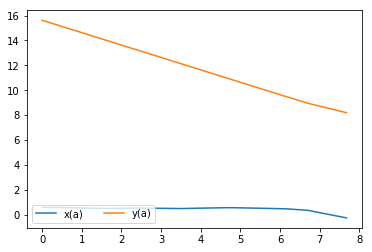

In [117]:
archerfish = Lighthill(midlinetime, transposedmidline[0], transposedmidline[1], archers, 997)
archerfish.inextensibilityCheck(5)
np.transpose(archerfish.extractBody("Mendelson_midlinedata.csv")[0])

#archerfish.extractTail()
#archerfish.underwater()
#archerfish.test()
print(archerfish.aCoordinates()[117])
#archerfish.cubicSplines()
# below is a figure to try to test model visually and see if we implemented things correctly
#plt.figure(figsize=(6.5,4))
#plt.plot(archerfish.t,archerfish.z,'o',label='data')
#plt.plot(archerfish.t, archerfish.dzdt, label="S")
#plt.plot(archerfish.t, archerfish.w)
#plt.plot(archerfish.z, cs_x(archerfish.z,1), label="S'") #first derivative
#plt.xlim(0,1)
#plt.legend(loc='lower left', ncol=2)
#plt.show()
#archerfish.waveform()
# plot x(a) and y(a) at a given time
#print(archerfish.aCoordinates())
#print(len(archerfish.aCoordinates()))

      
#x(a)
plt.figure()
plt.plot(archerfish.aCoordinates()[130],np.transpose(archerfish.body[130])[0], label='x(a)')
plt.plot(archerfish.aCoordinates()[130],np.transpose(archerfish.body[130])[1], label='y(a)')
plt.legend(loc='lower left', ncol=2)

# print(ma.count(archerfish.body[0])//2)